In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from langchain_openai import AzureChatOpenAI

llm = AzureChatOpenAI(
    azure_endpoint=os.getenv("AZURE_ENDPOINT"),
    api_key=os.getenv("AZUE_OPENAI_API_KEY"),
    azure_deployment=os.getenv("AZURE_DEPLOYMENT_NAME"),
    api_version=os.getenv("AZURE_VERSION")
)

llm.invoke("hi")

AIMessage(content='Hello! 😊 How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 8, 'total_tokens': 19, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-11-20', 'system_fingerprint': 'fp_ee1d74bde0', 'id': 'chatcmpl-BnHvCVHJveEF1yPQpQ0zWqyrvPUMh', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 

In [3]:
print(llm.invoke("What is the capital of india tell me in detail?").content)

The capital of India is **New Delhi**, which serves as the seat of the government as well as the political and administrative hub of the country. Here’s a detailed explanation about New Delhi and its significance:

### **Historical Background**
- New Delhi was officially inaugurated as the capital of India on **13 February 1931** during British colonial rule. It replaced **Calcutta (now Kolkata)**, which had served as the capital of India until 1911.
- The decision to move the capital to Delhi was made by the British government due to Delhi's historical importance as a center of power, dating back to several ruling dynasties including the Mughals.
- The city was designed by British architects **Sir Edwin Lutyens** and **Herbert Baker**, who planned much of the prominent government buildings and structures.

---

### **The City Layout**
New Delhi is known for its carefully planned infrastructure, wide roads, and colonial-era architecture. It is a part of **Delhi NCR (National Capital Re

In [4]:
import os
from langchain_community.tools.tavily_search import TavilySearchResults
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")
search_tool=TavilySearchResults(tavily_api_key=TAVILY_API_KEY)

In [5]:
search_tool.invoke("What is the capital of France?")

[{'title': 'Paris facts: the capital of France in history',
  'url': 'https://home.adelphi.edu/~ca19535/page%204.html',
  'content': 'page 4\n\n===============\n\nHomeSpainSydneySan FranciscoParisLas VegasMaui\n\n Paris, France\n\nImage 1\n\nParis facts: Paris, the capital of France\n---------------------------------------------\n\nParis is the capital of France, the largest country of Europe with 550 000 km2 (65 millions inhabitants).\n\nParis has 2.234 million inhabitants end 2011. She is the core of Ile de France region (12 million people). [...] Before Paris, the capital of France was Lyon (under the Romans). Paris first became the capital of France in 508 under King Clovis. After centuries with no unique capital of France, Paris retrieved its status of capital of France under King Philippe Auguste, who reigned between 1180 and 1223. You can see remains of the Philippe August Paris walls in the passageway between the Louvre parking and Louvre Museum [...] Paris remained the capital

In [6]:
my_code = """
x=10
y=x+10
print(y)
"""

In [7]:
from langchain_experimental.utilities import PythonREPL

In [8]:
repl=PythonREPL()

repl.run(my_code)

Python REPL can execute arbitrary code. Use with caution.


'20\n'

In [9]:
from typing import Annotated, Literal, TypedDict

In [10]:
from langchain_core.tools import tool

In [11]:
@tool
def python_repl_tool(code: Annotated[str, "The python code to execute to generate your chart."]):
    """Use this to execute python code and do math. If you want to see the output of a value,
    you should print it out with `print(...)`. This is visible to the user."""
    
    try:
        result = repl.run(code)
    except BaseException as e:
        return f"Failed to execute. Error: {repr(e)}"
    
    result_str = f"Successfully executed:\n\`\`\`python\n{code}\n\`\`\`\nStdout: {result}"
    return result_str

<>:11: SyntaxWarning: invalid escape sequence '\`'
<>:11: SyntaxWarning: invalid escape sequence '\`'
<>:11: SyntaxWarning: invalid escape sequence '\`'
<>:11: SyntaxWarning: invalid escape sequence '\`'
C:\Users\User\AppData\Local\Temp\ipykernel_8076\2860116823.py:11: SyntaxWarning: invalid escape sequence '\`'
  result_str = f"Successfully executed:\n\`\`\`python\n{code}\n\`\`\`\nStdout: {result}"
C:\Users\User\AppData\Local\Temp\ipykernel_8076\2860116823.py:11: SyntaxWarning: invalid escape sequence '\`'
  result_str = f"Successfully executed:\n\`\`\`python\n{code}\n\`\`\`\nStdout: {result}"


In [12]:
python_repl_tool.invoke("x=10\ny=x+10\nprint(y)")

'Successfully executed:\n\\`\\`\\`python\nx=10\ny=x+10\nprint(y)\n\\`\\`\\`\nStdout: 20\n'

In [13]:
python_repl_tool.invoke(my_code)

'Successfully executed:\n\\`\\`\\`python\n\nx=10\ny=x+10\nprint(y)\n\n\\`\\`\\`\nStdout: 20\n'

In [14]:
members=["researcher","coder"]

members

['researcher', 'coder']

In [15]:
options = members+["FINISH"]

options

['researcher', 'coder', 'FINISH']

In [16]:
class Router(TypedDict):
    next: Literal['researcher', 'coder', 'FINISH']

In [17]:
from langgraph.graph import MessagesState,StateGraph,START, END

In [18]:
class State(MessagesState):
    next:str

In [19]:
system_prompt = f""""
You are a supervisor, tasked with managing a conversation between the following workers: {members}. 
Given the following user request, respond with the worker to act next. 
Each worker will perform a task and respond with their results and status. 
When finished, respond with FINISH.
"""

system_prompt

'"\nYou are a supervisor, tasked with managing a conversation between the following workers: [\'researcher\', \'coder\']. \nGiven the following user request, respond with the worker to act next. \nEach worker will perform a task and respond with their results and status. \nWhen finished, respond with FINISH.\n'

### These are the three Agents

In [20]:
from langgraph.types import Command

In [21]:
def supervisor_agent(state:State)->Command[Literal['researcher', 'coder', '__end__']]:
    
    messages = [{"role": "system", "content": system_prompt},] + state["messages"]
    
    llm_with_structure_output=llm.with_structured_output(Router)
    
    response=llm_with_structure_output.invoke(messages)
    
    #this is my next worker agent
    goto=response["next"]
    
    print("**********BELOW IS MY GOTO***************")
    
    print(goto)
    
    if goto == "FINISH":
        goto=END
        
    return Command(goto=goto, update={"next":goto})

In [23]:
from langgraph.prebuilt import create_react_agent

from langchain_core.messages import AIMessage, HumanMessage

In [24]:
def research_agent(state: State) -> Command[Literal["supervisor"]]:
    
    research_agent = create_react_agent(llm, tools=[search_tool], prompt="You are a researcher. DO NOT do any math.")
    
    result=research_agent.invoke(state)
    
    return Command(
        update={
            "messages": [
                HumanMessage(content=result["messages"][-1].content, name="researcher")
            ]
        },
        goto="supervisor",
    )

In [25]:
def coder_agent(state:State)->Command[Literal['supervisor']]:
    code_agent=create_react_agent(llm,tools=[python_repl_tool], prompt="You are a coder. DO NOT do any research.")
    result=code_agent.invoke(state)
    
    return Command(
        update={
            "messages": [
                HumanMessage(content=result["messages"][-1].content, name="coder")
            ]
        },
        goto="supervisor",
    )

### Orchestration from LangGraph

In [26]:
# Defining the StateGraph
graph=StateGraph(State)

# Defining the Nodes
graph.add_node("supervisor", supervisor_agent)
graph.add_node("researcher", research_agent)
graph.add_node("coder", coder_agent)

# Defining the Edges
graph.add_edge(START, "supervisor")

# Compile the Graph
app=graph.compile()


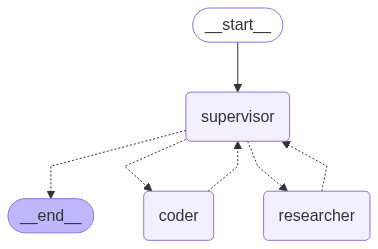

In [27]:
# View the Graph
from IPython.display import display,Image
display(Image(app.get_graph().draw_mermaid_png()))

In [28]:
for s in app.stream({"messages": [("user", "What's the square root of 42?")]}, subgraphs=True):
    print(s)
    print("**********BELOW IS MY STATE***************")

**********BELOW IS MY GOTO***************
coder
((), {'supervisor': {'next': 'coder'}})
**********BELOW IS MY STATE***************
(('coder:63a956d6-0443-489c-6327-3d7ea85ce33e',), {'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_dwlOC1IGdqrRWIIXA6G8Btha', 'function': {'arguments': '{"code":"import math\\nmath.sqrt(42)"}', 'name': 'python_repl_tool'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 107, 'total_tokens': 131, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-11-20', 'system_fingerprint': 'fp_ee1d74bde0', 'id': 'chatcmpl-BnI2WDsWZo0yuJrksJSuKaodRZJMT', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severit

In [29]:
app.invoke({"messages": [("user", "what is an efficient python code to get prime number?")]}, subgraphs=True)

**********BELOW IS MY GOTO***************
coder
**********BELOW IS MY GOTO***************
coder
**********BELOW IS MY GOTO***************
FINISH


((),
 {'messages': [HumanMessage(content='what is an efficient python code to get prime number?', additional_kwargs={}, response_metadata={}, id='741ef6d8-bae7-4b49-8dfa-3f3acc8782c0'),
   HumanMessage(content='Here’s an efficient Python code to generate prime numbers using the popular [Sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes) algorithm. This method is particularly useful for finding all primes up to a given number `n` and is more efficient than checking each number individually.\n\n```python\ndef sieve_of_eratosthenes(n):\n    """\n    Generate all prime numbers less than or equal to n using the Sieve of Eratosthenes.\n    :param n: int - Upper limit to find primes.\n    :return: List[int] - List of primes up to n.\n    """\n    if n < 2:\n        return []\n\n    # Create a boolean array "prime[0..n]" and initialize all entries as True.\n    # A value in prime[i] will be False if i is not a prime, else True.\n    prime = [True for _ in range(n + 1)]

In [30]:
app.invoke({"messages": [("user", "please give me a code snippet of finding prime numbers in range in different programming langugages")]}, subgraphs=True)

**********BELOW IS MY GOTO***************
researcher
**********BELOW IS MY GOTO***************
coder
**********BELOW IS MY GOTO***************
FINISH


((),
 {'messages': [HumanMessage(content='please give me a code snippet of finding prime numbers in range in different programming langugages', additional_kwargs={}, response_metadata={}, id='08e1fb31-c409-44c7-9e5f-bccd88ad4ce7'),
   HumanMessage(content='Sure! Below are code snippets for finding prime numbers in a given range in a few different programming languages.\n\n---\n\n### Python\n```python\ndef is_prime(num):\n    if num < 2:\n        return False\n    for i in range(2, int(num ** 0.5) + 1):\n        if num % i == 0:\n            return False\n    return True\n\ndef find_primes_in_range(start, end):\n    return [num for num in range(start, end + 1) if is_prime(num)]\n\n# Example usage\nstart = 10\nend = 50\nprint(find_primes_in_range(start, end))\n```\n\n---\n\n### Java\n```java\nimport java.util.ArrayList;\nimport java.util.List;\n\npublic class PrimeNumbers {\n    public static boolean isPrime(int num) {\n        if (num < 2) return false;\n        for (int i = 2; i <= Mat